# Supplement Figures: S10

## S10: Relationship between changes in low cloud cover and evapotranspiration for the CESM2 PI PPE

In [ ]:
xvar = "ET"
yvar = "CLDLOW"

fig = plt.figure(figsize=(10,3))
ax = fig.subplot_mosaic(
    [['scatter', 'map']],
    width_ratios=[1, 1.8],
    per_subplot_kw={'map': {'projection': ccrs.Robinson()}}
)

these_stats = dict(hadhst=dict(), hada1b=dict(), cesm=dict(), cmip=dict())
sm = "lm"

key = "cesm"
x = cesm_delta_areamean[sm][xvar]
y = cesm_delta_areamean[sm][yvar]
these_stats[key][yvar] = myplt.plot_scatter_regression(ax["scatter"], x, y, myplt.ols_single, key, do_print=True)

## Add description of fit statistics to each subplot
def format_label_text(this_stats, key, alpha=0.05):
    ast = ""
    if this_stats["slope_p_value"] < alpha:
        ast = "^*"
    this_label = f"{myplt.label_dict[key]}: ${this_stats['slope']: 0.3f} \\pm {this_stats['slope_ci_halfwidth']: 0.3f}{ast}$"
    return this_label

stats_xpos = 0.04
stats_ypos = 0.7
stats_width = 0.46
stats_height = 0.25

ax["scatter"].text(
    stats_xpos, stats_ypos+3*(stats_height/4),
    format_label_text(these_stats["cesm"]["CLDLOW"], "cesm", alpha=0.05),
    fontsize=8, color=myplt.c_dict["cesm"],
    ha='left', va='top',
    transform=ax["scatter"].transAxes
)

## Set axis labels
ax["scatter"].set_xlabel('$\delta E_L$ [mm day$^{-1}$]', fontsize=10)
ax["scatter"].set_ylabel('$\delta \\, \\text{CLDLOW}_L$ [fraction]', fontsize=10)

vabs = 0.4
cmap = 'PuOr'

cf = myplt.plot_slope_map(ax["map"], cesm_delta[xvar], cesm_delta[yvar], myplt.ols_field, alpha_fdr=0.05, cmap=cmap, vmin=-vabs, vmax=vabs, mask_ocean=cesm_weights["landweights"])
# cf = myplt.plot_slope_map(ax["map"], cesm_delta[xvar], cesm_delta[yvar], myplt.ols_field, alpha_fdr=0.05, cmap=cmap, vmin=-vabs, vmax=vabs, mask_ocean=None)

cb = fig.colorbar(cf, ax=ax["map"], fraction=0.023, orientation='vertical')
cb.ax.tick_params(labelsize=8)
cb.set_ticks(np.arange(-0.4, 0.41, 0.1))
cb.set_label('Grid-point slope $\delta \\text{CLDLOW} \\, / \\, \delta E$\n[fraction / mm day$^{-1}$]', fontsize=8)

## Add numbering
ax["scatter"].text(
    0.02, 0.975, f'(a)',
    fontsize=12,
    fontweight='regular',
    ha='left', va='top',
    transform=ax["scatter"].transAxes)

ax["map"].text(
    0.02, 0.975, '(b)',
    fontsize=12,
    fontweight='regular',
    ha='left', va='top',
    transform=ax["map"].transAxes)

## Save figure
plt.tight_layout()
plt.show()
# fig.savefig(f'delta_cldlow.png', dpi=export_dpi, bbox_inches='tight')
fig.savefig(f'delta_cldlow.pdf', bbox_inches='tight')
# fig.savefig(f'delta_cldlow.svg', bbox_inches='tight')

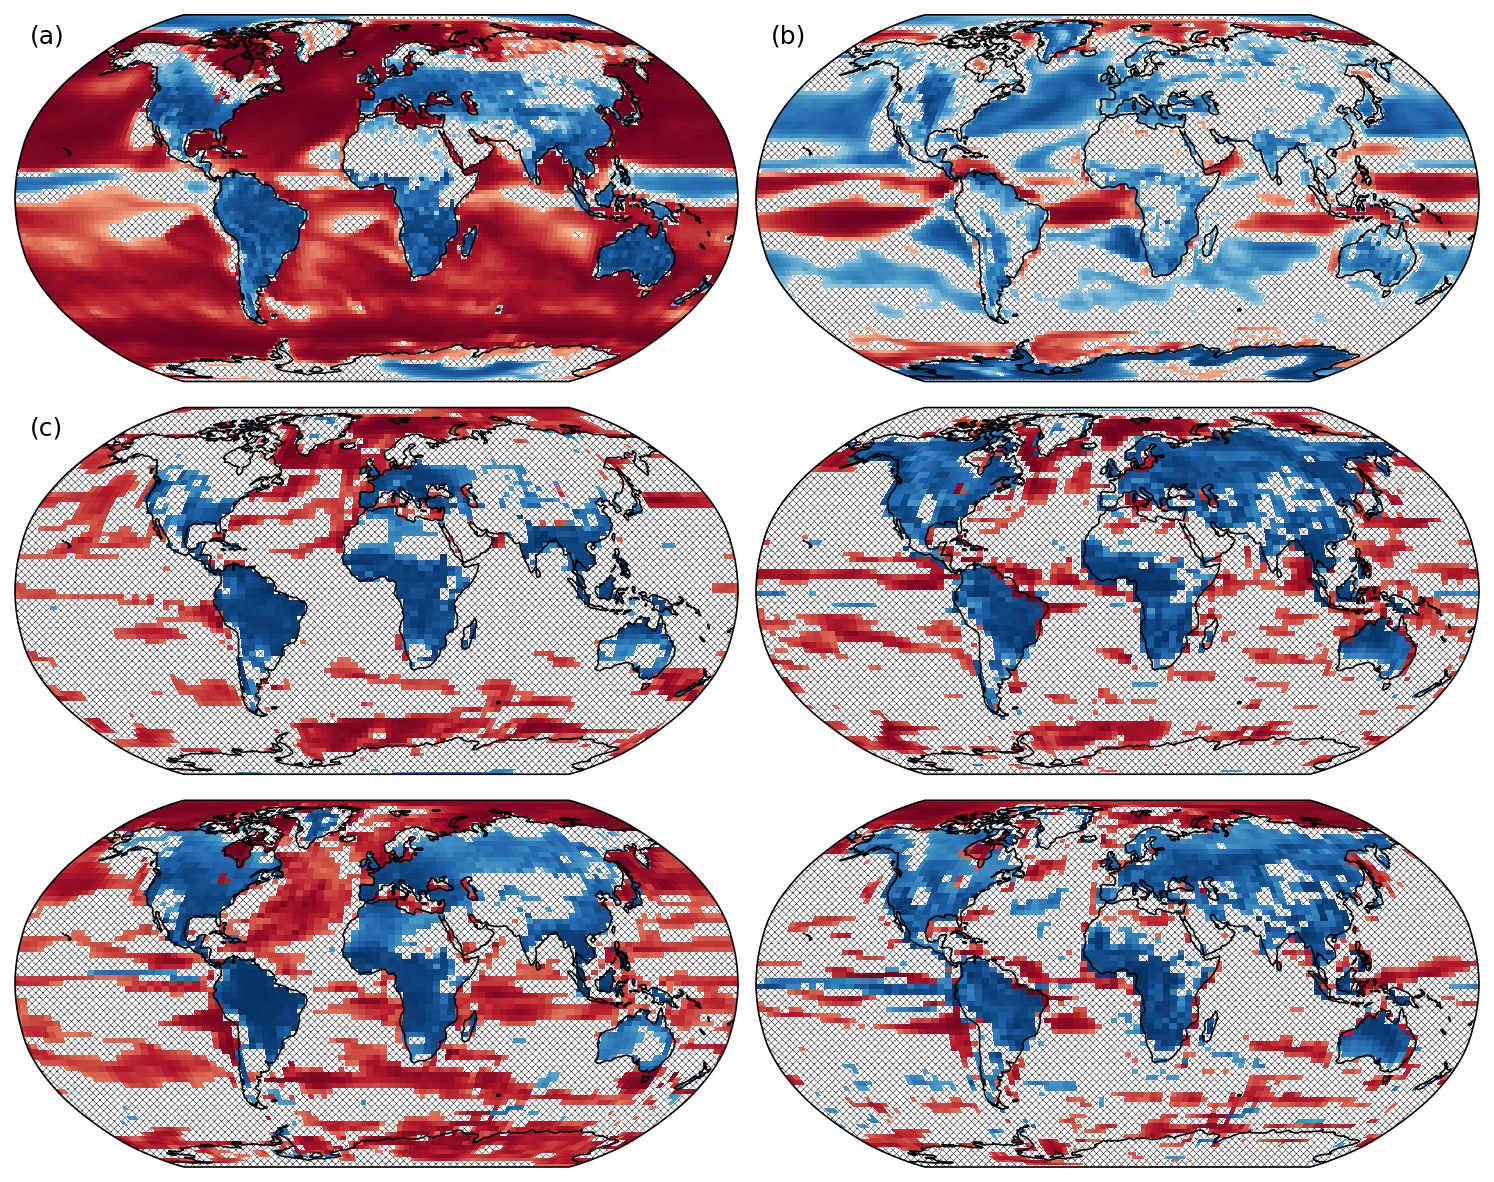

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(10, 8), subplot_kw={"projection": ccrs.Robinson()})
ax = axes.flatten()

for i, xvar in enumerate(["T_S", "U_10m"]):
    x = cesm_delta[xvar]
    y = cesm_delta["ET"]
    cf1 = ppeplot.plot_corr_map(ax[i], x, y, alpha_fdr=0.05, sample_dim="member", vmin=-1, vmax=1, cmap="RdBu_r")

    x = hadhst_delta[xvar]
    y = hadhst_delta["ET"].reindex_like(hadhst_delta[xvar], method="nearest")
    cf2 = ppeplot.plot_corr_map(ax[i+2], x, y, alpha_fdr=0.05, sample_dim="member", vmin=-1, vmax=1, cmap="RdBu_r")

    x = hada1b_delta[xvar]
    y = hada1b_delta["ET"].reindex_like(hada1b_delta[xvar], method="nearest")
    cf3 = ppeplot.plot_corr_map(ax[i+4], x, y, alpha_fdr=0.05, sample_dim="member", vmin=-1, vmax=1, cmap="RdBu_r")

    # ax[0].set_title(ppeplot.label_dict["cesm"], fontsize=10, fontweight='bold')
    # ax[1].set_title(ppeplot.label_dict["hadhst"], fontsize=10, fontweight='bold')
    # ax[2].set_title(ppeplot.label_dict["hada1b"], fontsize=10, fontweight='bold')

    ## Add colorbar
    # for j, cf in enumerate([cf1, cf2, cf3]):
    #     cb = fig.colorbar(cf, ax=ax[i+4+j], orientation='vertical')
    #     cb.ax.tick_params(labelsize=8)
    #     cb.set_ticks([-1, -0.5, 0, 0.5, 1])
    #     cb.set_label(f'Grid-point corr( $\delta \\text{{{xvar}}} \\, ; \\, \delta E$)', fontsize=6)

## Add subplot numbering
for a, letter in zip(ax, ppeplot.figenum[:3]):
    a.text(
        0.02, 0.975, f'({letter})',
        fontsize=12,
        fontweight='regular',
        ha='left', va='top',
        transform=a.transAxes)

## Save figure
plt.tight_layout()
plt.show()
# fig.savefig(f'corr_delta_u10_delta_e.png', dpi=export_dpi, bbox_inches='tight')
# fig.savefig(f'corr_delta_u10_delta_e.pdf', bbox_inches='tight')
# fig.savefig(f'corr_delta_u10_delta_e.svg', bbox_inches='tight')